<a href="https://colab.research.google.com/github/Andrew513/signalReport/blob/main/SignalReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator
from datetime import timedelta

In [2]:
df = pd.read_csv(
    'https://covid.ourworldindata.org/data/owid-covid-data.csv', 
    usecols=['date', 'location', 'total_vaccinations_per_hundred'], 
    parse_dates=['date']) #turn things into real datetime types

countries = ['Taiwan', 'Singapore', 'Japan', 'China', 'South Korea']
df = df[df['location'].isin(countries)]

In [3]:
# Step 2: Summarize the data
pivot = pd.pivot_table(
    data=df,                       # What dataframe to use
    index='date',                  # The "rows" of your dataframe
    columns='location',            # What values to show as columns
    values='total_vaccinations_per_hundred',    # What values to aggregate(統計)
    aggfunc='mean',                # How to aggregate data(average the value)
    )

pivot = pivot.fillna(method='ffill') #fulfill the nan to other datas

In [4]:
# Step 3: Set up key variables for the visualization
main_country = 'Taiwan'
colors = {country:('gray' if country!= main_country else 'blue') for country in countries}

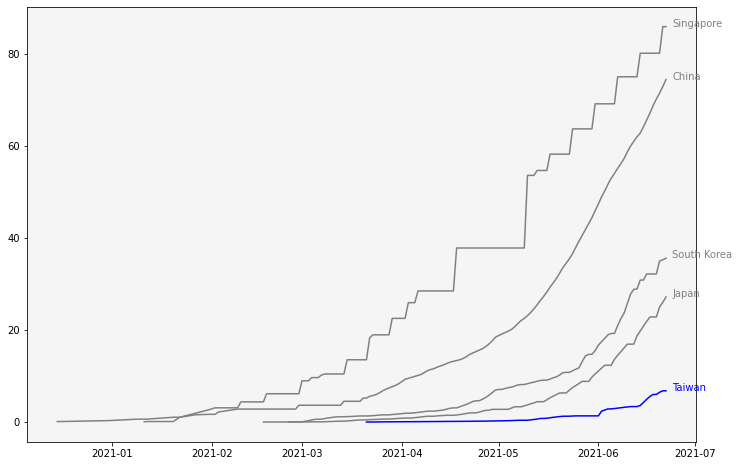

In [5]:
# Step 4: Plot all countries
fig, ax = plt.subplots(figsize=(12,8))#inch(width height)
ax.patch.set_facecolor('#F5F5F5')     # Change background color to a light grey

for country in countries:
    ax.plot(
        pivot.index,              # What to use as your x-values
        pivot[country],           # What to use as your y-values
        color=colors[country],    # How to color your line
    )
    ax.text(
        x = pivot.index[-1] + timedelta(days=2),    # Where to position your text relative to the x-axis---where to put text(x)
        y = pivot[country].max(),                   # How high to position your text-----------------------where to put text(y)
        color = colors[country],                    # What color to give your text
        s = country,                                # What to write
    )